<h1> <center> 6 - Bill Subject Assignment </center> </h1>

**Author:** Sebastião Rosalino, nº 20230372

**Supervisors:** Flávio Pinheiro, António Curado

<div style="text-align: center;">
    <img src="../logos/nova_ims_logo.png" alt="Image 1" style="width: 15%; display: inline-block; margin: 0 10px;"/>
    <img src="../logos/european_parliament_logo.png" alt="Image 2" style="width: 15%; display: inline-block; margin: 0 10px;"/>
</div>

# Table of Contents

1. [Data Preparation](#Data-Preparation)
2. [Web Scraping of Bill Subjects from Legislative Observatory](#Web-Scraping-of-Bill-Subjects-from-Legislative-Observatory)
3. [Engineering of Bill Subjects](#Engineering-of-Bill-Subjects])
4. [Creation of the Primary Subject Bills Dataset](#Creation-of-the-Primary-Subject-Bills-Dataset)
5. [Creation of the Secondary Subject Bills Dataset](#Creation-of-the-Secondary-Subject-Bills-Dataset)
6. [Creation of the Tertiary Subject Bills Dataset](#Creation-of-the-Tertiary-Subject-Bills-Dataset)
7. [Exporting Datasets](#Exporting-Datasets)

In [1]:
# Import the necessary libraries and configurations
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from tqdm import tqdm

pd.set_option('display.max_colwidth', None)  # No truncation of column contents

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the bills dataset from its corresponding folder and read the subjects_correspondence excel
bills = pd.read_csv("../datasets/second_stage/4_bills/bills.csv")
subjects_correspondance = pd.read_excel("../datasets/second_stage/6_bill_subject_assignment/subjects_correspondence.xlsx")

In [3]:
# Visualize how the bills dataset currently looks like
bills

,timestamp,procedure_reference,id_bill,text
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement
...,...,...,...,...
1898,2024-04-25 12:51:39,2024/2696(RSP),1902,joint motion resolution new allegation russian interference european parliament upcoming eu election impact european union
1899,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan notably repression civil society case dr gubad ibadoghlu ilhamiz guliyev european parliament having regard previous resolution azerbaijan having regard rule 1445 1324 rule procedure azerbaijan intensify repression civil society activist remain independent medium abzas medium detention judicial harassment civil society organisation currently list nearly 300 political prisoner azerbaijan gubad ibadoghlu political economist opposition figure arrest azerbaijani authority july 2023 remain detention 22 april 2024 transfer house arrest health deteriorate significantly arrest result torture inhumane detention condition refusal adequate medical care endanger life ilhamiz guliyev human right defender arbitrarily arrest december 2023 dubious accusation drug trafficking testify whistleblower police tamper evidence government critic face 12 year prison urge azerbaijan immediately unconditionally release ilhamiz guliyev note gubad ibadoghlu release place house arrest call authority lift travel ban drop charge call azerbaijan urgently ensure receive independent medical examination doctor choose allow receive treatment abroad urge azerbaijan immediately unconditionally release political prisoner include tofig yagublu akif gurbanov bakhtiyar hajiyev human rights defenders journalist ulvi hasanli sevinj vagifgizi nargiz absalamova hafiz babali elnara gasimova aziz orujov rufat muradli avaz zeynalli elnur shukurov alasgar mammadli farid ismayilov eu nationals remind azerbaijani authority obligation respect human dignity fundamental freedom call repeal repressive legislation drive independent non-governmental organisation medium margin law consider ongoing human right violation azerbaijan incompatible country preparation host cop29 demand organiser ensure human right fundamental freedom effective civil society participation fully enshrine guarantee host country agreement call commission consider suspend strategic partnership azerbaijan field energy insist make future partnership agreement conditional release political prisoner improvement overall human right situation country call eu special representative human right request meeting political prisoner azerbaijan reiterate eu sanction global human rights sanctions regime impose azerbaijani official commit human right violation instruct president forward resolution council commission vice-president commission high representative union foreign affairs security policy member state president government parliament azerbaijan
1900,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment punishment having regard african charter human peoples rights maputo protocol african charter rights welfare child having regard sustainable development goal aim global eradication female genital mutilation fgm 2030 having regard rule 1445 1324 rule procedure land

In [4]:
# Visualize the subjects_correspondance dataframe
subjects_correspondance

,Primary Subject,Secondary Subject,Tertiary Subject
0,1. European citizenship,"1.10 Fundamental rights in the EU, Charter",NaN
1,1. European citizenship,1.20 Citizen's rights,"1.20.01 Political rights, right to vote and to stand in elections"
2,1. European citizenship,1.20 Citizen's rights,1.20.02 Social and economic rights
3,1. European citizenship,1.20 Citizen's rights,1.20.03 Right of petition
4,1. European citizenship,1.20 Citizen's rights,1.20.04 European Ombudsman
...,...,...,...
274,8. State and evolution of the Union,8.70 Budget of the Union,8.70.53 2023 budget
275,8. State and evolution of the Union,8.70 Budget of the Union,8.70.54 2024 budget
276,8. State and evolution of the Union,8.70 Budget of the Union,8.70.58 2018 budget
277,8. State and evolution of the Union,8.70 Budget of the Union,8.70.59 2019 budget


## 1. Data Preparation
<a id="Data-Preparation"></a>

In [5]:
# Create a dataframe for each level of subjects
primary_subject_correspondence = subjects_correspondance[['Primary Subject']].drop_duplicates().reset_index(drop=True)
secondary_subject_correspondence = subjects_correspondance[['Secondary Subject']].drop_duplicates().reset_index(drop=True)
tertiary_subject_correspondence = subjects_correspondance[['Tertiary Subject']].dropna().drop_duplicates().reset_index(drop=True)

In [6]:
# Split the "Primary Subject" column into two new columns: "identifier" and "primary_subject"
primary_subject_correspondence["identifier"] = primary_subject_correspondence["Primary Subject"].str.extract(r"^(\d+)")
primary_subject_correspondence["primary_subject"] = primary_subject_correspondence["Primary Subject"].str.extract(r"^\d+\.\s*(.+)$")

# Drop the old "Primary Subject" column
primary_subject_correspondence = primary_subject_correspondence[["identifier", "primary_subject"]]

# Visualize the resulting dataframe 
primary_subject_correspondence

,identifier,primary_subject
0,1,European citizenship
1,2,"Internal market, single market"
2,3,Community policies
3,4,"Economic, social and territorial cohesion"
4,5,Economic and monetary system
5,6,External relations of the Union
6,7,"Area of freedom, security and justice"
7,8,State and evolution of the Union


In [7]:
# Split the "Secondary Subject" column into two new columns: "identifier" and "secondary_subject"
secondary_subject_correspondence[['identifier', 'secondary_subject']] = secondary_subject_correspondence[
    'Secondary Subject'
].str.extract(r'^(\d+\.\d+)\s+(.*)$')

# Drop the old "Secondary Subject" column
secondary_subject_correspondence = secondary_subject_correspondence[['identifier', 'secondary_subject']]

# Visualize the resulting dataframe 
secondary_subject_correspondence

,identifier,secondary_subject
0,1.10,"Fundamental rights in the EU, Charter"
1,1.20,Citizen's rights
2,2.10,Free movement of goods
3,2.20,Free movement of persons
4,2.30,Free movement of workers
5,2.40,"Free movement of services, freedom to provide"
6,2.50,Free movement of capital
7,2.60,Competition
8,2.70,Taxation
9,2.80,Cooperation between administrations


In [8]:
# Split the "Tertiary Subject" column into two new columns: "identifier" and "tertiary_subject"
tertiary_subject_correspondence[['identifier', 'tertiary_subject']] = tertiary_subject_correspondence['Tertiary Subject'].str.split(n=1, expand=True)

# Drop the old "Tertiary Subject" column
tertiary_subject_correspondence = tertiary_subject_correspondence[["identifier", "tertiary_subject"]]

# Visualize the resulting dataframe
tertiary_subject_correspondence

,identifier,tertiary_subject
0,1.20.01,"Political rights, right to vote and to stand in elections"
1,1.20.02,Social and economic rights
2,1.20.03,Right of petition
3,1.20.04,European Ombudsman
4,1.20.05,"Public access to information and documents, administrative practice"
...,...,...
264,8.70.53,2023 budget
265,8.70.54,2024 budget
266,8.70.58,2018 budget
267,8.70.59,2019 budget


## 2. Web Scraping of Bill Subjects from Legislative Observatory
<a id="Web-Scraping-of-Bill-Subjects-from-Legislative-Observatory"></a>

In [9]:
# Initialize a new column in the bills dataframe to store the subjects
bills['subjects'] = None

# Iterate over each row to extract the subject information
for index, row in tqdm(bills.iterrows(), total=bills.shape[0], desc="Extracting bill subjects"):
    
    procedure_reference = row['procedure_reference']
    
    # Construct the URL
    url = f"https://oeil.secure.europarl.europa.eu/oeil/en/procedure-file?reference={procedure_reference}"

    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Locate the div containing the 'Subject' section based on the HTML structure
        subject_div = soup.find('p', text="Subject").find_next_sibling('p')

        if subject_div:
            
            # Extract text content, separating by <br> tags in case of a bill containing more than one subject
            subject_list = [item.strip() for item in subject_div.stripped_strings]
            
            # Store the subjects as a list in the bills dataframe
            bills.at[index, 'subjects'] = subject_list

        # If no subject was found set to NaN
        else:
            bills.at[index, 'subjects'] = None

    # Handle potential errors gracefully
    except requests.exceptions.RequestException as e:
        
        print(f"Error processing {procedure_reference}: {e}")
        bills.at[index, 'subjects'] = None

Extracting bill subjects:   4%|▍         | 80/1903 [05:13<1:14:23,  2.45s/it]

Error processing 2019/0001(COD): 404 Client Error:  for url: https://oeil.secure.europarl.europa.eu/oeil/en/procedure-file?reference=2019/0001(COD)


Extracting bill subjects: 100%|██████████| 1903/1903 [1:33:52<00:00,  2.96s/it]


In [10]:
# Visualize the bills dataset
bills

,timestamp,procedure_reference,id_bill,text,subjects
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,"[3.20.15.02 Air transport agreements and cooperation, 6.40.05.02 Relations with the countries of the Great Maghreb and Maghreb]"
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,[3.20.15.02 Air transport agreements and cooperation]
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,[3.20.15.02 Air transport agreements and cooperation]
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,[3.20.15.02 Air transport agreements and cooperation]
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement,[3.20.15.02 Air transport agreements and cooperation]
...,...,...,...,...,...
1898,2024-04-25 12:51:39,2024/2696(RSP),1902,joint motion resolution new allegation russian interference european parliament upcoming eu election impact european union,"[3.30.16 Ethical information policy, 3.30.25 International information networks and society, internet, 8.40.01.01 Elections, direct universal suffrage]"
1899,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan notably repression civil society case dr gubad ibadoghlu ilhamiz guliyev european parliament having regard previous resolution azerbaijan having regard rule 1445 1324 rule procedure azerbaijan intensify repression civil society activist remain independent medium abzas medium detention judicial harassment civil society organisation currently list nearly 300 political prisoner azerbaijan gubad ibadoghlu political economist opposition figure arrest azerbaijani authority july 2023 remain detention 22 april 2024 transfer house arrest health deteriorate significantly arrest result torture inhumane detention condition refusal adequate medical care endanger life ilhamiz guliyev human right defender arbitrarily arrest december 2023 dubious accusation drug trafficking testify whistleblower police tamper evidence government critic face 12 year prison urge azerbaijan immediately unconditionally release ilhamiz guliyev note gubad ibadoghlu release place house arrest call authority lift travel ban drop charge call azerbaijan urgently ensure receive independent medical examination doctor choose allow receive treatment abroad urge azerbaijan immediately unconditionally release political prisoner include tofig yagublu akif gurbanov bakhtiyar hajiyev human rights defenders journalist ulvi hasanli sevinj vagifgizi nargiz absalamova hafiz babali elnara gasimova aziz orujov rufat muradli avaz zeynalli elnur shukurov alasgar mammadli farid ismayilov eu nationals remind azerbaijani authority obligation respect human dignity fundamental freedom call repeal repressive legislation drive independent non-governmental organisation medium margin law consider ongoing human right violation azerbaijan incompatible country preparation host cop29 demand organiser ensure human right fundamental freedom effective civil society participation fully enshrine guarantee host country agreement call commission consider suspend strategic partnership azerbaijan field energy insist make future partnership agreement conditional release political prisoner improvement overall human right situation country call eu special representative human right request meeting political prisoner azerbaijan reiterate eu sanction global human rights sanctions regime impose azerbaijani official commit human right violation instruct president forward resolution council commission vice-president commission high representative union foreign affairs security policy member state president government parliament azerbaijan,"[6.10.08 Fundamental freedoms, human rights, democracy in general]"
1900

The failed procedure reference failed because there is no procedure reference identified by 2019/0001(COD) in the European Parliament's Legislative Observatory.

However, when we search for 2019/0001(COD) in the search engine of the Legislative Observatory, we get two results:

1. 2019/0001A(COD) with the text: "ETIAS consequential amendments: police and judicial cooperation"
2. 2019/0001B(COD) with the text: "ETIAS consequential amendments: ECRIS-TCN"

So, let's check the text of the failed procedure reference.

In [11]:
bills[bills["procedure_reference"] == "2019/0001(COD)"]

,timestamp,procedure_reference,id_bill,text,subjects
79,2021-06-07 20:37:34,2019/0001(COD),597,etias consequential amendment police judicial cooperation,None


We confirm that the failed procedure reference corresponded, in fact, to the procedure reference 2019/0001A(COD). When we search for this procedure reference in the Legislative Observatory (https://oeil.secure.europarl.europa.eu/oeil/en/procedure-file?reference=2019/0001A(COD)) we are able to see its subjects: 

7.10.04 External borders crossing and controls, visas

7.30.05 Police cooperation

7.40.04 Judicial cooperation in criminal matters

Let's correct this manually.

In [12]:
# Define the subjects to be inserted
subjects_to_insert = [
    "7.10.04 External borders crossing and controls, visas",
    "7.30.05 Police cooperation",
    "7.40.04 Judicial cooperation in criminal matters"
]

# Locate and delete the old procedure reference
bills = bills[bills['procedure_reference'] != '2019/0001(COD)']

# Create a new row with the correct procedure reference and its data
new_row = {
    'procedure_reference': '2019/0001A(COD)',
    'id_bill': 597,
    'timestamp': pd.to_datetime("2021-06-07 20:37:34"),
    'text': "etias consequential amendment police judicial cooperation",
    'subjects': subjects_to_insert
}

# Append the new row to the dataframe
bills = pd.concat([bills, pd.DataFrame([new_row])], ignore_index=True)

# Verify the updated dataframe
bills.loc[bills['procedure_reference'] == '2019/0001A(COD)']

,timestamp,procedure_reference,id_bill,text,subjects
1902,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,"[7.10.04 External borders crossing and controls, visas, 7.30.05 Police cooperation, 7.40.04 Judicial cooperation in criminal matters]"


## 3. Engineering of Bill Subjects
<a id="Engineering-of-Bill-Subjects"></a>

In [13]:
# Preview how the bills dataset looks like after subjects assignment through Web Scraping
bills

,timestamp,procedure_reference,id_bill,text,subjects
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,"[3.20.15.02 Air transport agreements and cooperation, 6.40.05.02 Relations with the countries of the Great Maghreb and Maghreb]"
1,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,[3.20.15.02 Air transport agreements and cooperation]
2,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,[3.20.15.02 Air transport agreements and cooperation]
3,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,[3.20.15.02 Air transport agreements and cooperation]
4,2020-06-17 23:24:52,2012/0006(NLE),198,eumoldova common aviation area agreement,[3.20.15.02 Air transport agreements and cooperation]
...,...,...,...,...,...
1898,2024-04-25 12:20:42,2024/2698(RSP),1898,european parliament resolution azerbaijan notably repression civil society case dr gubad ibadoghlu ilhamiz guliyev european parliament having regard previous resolution azerbaijan having regard rule 1445 1324 rule procedure azerbaijan intensify repression civil society activist remain independent medium abzas medium detention judicial harassment civil society organisation currently list nearly 300 political prisoner azerbaijan gubad ibadoghlu political economist opposition figure arrest azerbaijani authority july 2023 remain detention 22 april 2024 transfer house arrest health deteriorate significantly arrest result torture inhumane detention condition refusal adequate medical care endanger life ilhamiz guliyev human right defender arbitrarily arrest december 2023 dubious accusation drug trafficking testify whistleblower police tamper evidence government critic face 12 year prison urge azerbaijan immediately unconditionally release ilhamiz guliyev note gubad ibadoghlu release place house arrest call authority lift travel ban drop charge call azerbaijan urgently ensure receive independent medical examination doctor choose allow receive treatment abroad urge azerbaijan immediately unconditionally release political prisoner include tofig yagublu akif gurbanov bakhtiyar hajiyev human rights defenders journalist ulvi hasanli sevinj vagifgizi nargiz absalamova hafiz babali elnara gasimova aziz orujov rufat muradli avaz zeynalli elnur shukurov alasgar mammadli farid ismayilov eu nationals remind azerbaijani authority obligation respect human dignity fundamental freedom call repeal repressive legislation drive independent non-governmental organisation medium margin law consider ongoing human right violation azerbaijan incompatible country preparation host cop29 demand organiser ensure human right fundamental freedom effective civil society participation fully enshrine guarantee host country agreement call commission consider suspend strategic partnership azerbaijan field energy insist make future partnership agreement conditional release political prisoner improvement overall human right situation country call eu special representative human right request meeting political prisoner azerbaijan reiterate eu sanction global human rights sanctions regime impose azerbaijani official commit human right violation instruct president forward resolution council commission vice-president commission high representative union foreign affairs security policy member state president government parliament azerbaijan,"[6.10.08 Fundamental freedoms, human rights, democracy in general]"
1899,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment puni

In [14]:
# Use the explode function to create one row per subject, for each procedure reference and assign the result to a new dataframe called 
# 'bills_exploded'
bills_exploded = bills.explode('subjects', ignore_index=True)

# Display the resulting dataframe
bills_exploded

,timestamp,procedure_reference,id_bill,text,subjects
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02 Air transport agreements and cooperation
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02 Relations with the countries of the Great Maghreb and Maghreb
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02 Air transport agreements and cooperation
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02 Air transport agreements and cooperation
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02 Air transport agreements and cooperation
...,...,...,...,...,...
3713,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,"6.10.08 Fundamental freedoms, human rights, democracy in general"
3714,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,"6.10.04 Third-country political situation, local and regional conflicts"
3715,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,"7.10.04 External borders crossing and controls, visas"
3716,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05 Police cooperation


In [15]:
# Extract only the subject codes (located before the first space) and filter out the text in the 'subjects' column
bills_exploded['subjects'] = bills_exploded['subjects'].str.split(' ').str[0]

# Display the updated dataframe
bills_exploded

,timestamp,procedure_reference,id_bill,text,subjects
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02
...,...,...,...,...,...
3713,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08
3714,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,6.10.04
3715,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.10.04
3716,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05


## 4. Creation of the Primary Subject Bills Dataset
<a id="Creation-of-the-Primary-Subject-Bills-Dataset"></a>

In [16]:
# Create a new column for the primary subject by extracting the first digit of the 'subjects' column
bills_exploded['primary_subject'] = bills_exploded['subjects'].str.split('.').str[0]

# Remove duplicates based on 'procedure_reference' and 'primary_subject', keeping only the first occurrence (as all the remaining information is the same) 
# and saving the results to a new dataset called 'primary_subject_bills'
primary_subject_bills = bills_exploded.drop_duplicates(subset=['procedure_reference', 'primary_subject'])

# Convert the primary_subject column to string datatype
primary_subject_bills["primary_subject"] = primary_subject_bills["primary_subject"].astype(str)

# Display the resulting Primary Subject Bills dataframe
primary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,3
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,6
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,3
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,3
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,3
...,...,...,...,...,...,...
3710,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment punishment having regard african charter human peoples rights maputo protocol african charter rights welfare child having regard sustainable development goal aim global eradication female genital mutilation fgm 2030 having regard rule 1445 1324 rule procedure landmark womens amendment act 2015 gambia ban fmg make punishable year prison 18 march 2024 propose law repeal ban pass second reading gambian parliament refer parliamentary committee month examine return parliament final review gambia risk country world reverse legal protection fgm risk encourage similar weakening right women girls region fgm grave violation human right discrimination girl woman justify religion culture abusive exploitative harmful practice severe consequence include irreparable physical psychological reproductive sexual health damage lead death prevent woman girl reach potential participate society gambia high prevalence fgm world accord unicef 76 gambian woman age 15-49 circumcise 230 million girl woman worldwide affect fgm urge gambian parliament demonstrate commitment international human rights law multiple international regional agreement gambia signatory protect rights women girls reject proposal uphold criminalisation fgm urge gambian government strengthen effort prevent eliminate fgm robust enforcement measure awareness education effort address root cause invite gambian government engage international partner notably unfpa-unicef joint programme elimination fgm stand ready support government civil society organisation community engagement include religious traditional community leader combat fgm support survivor womens right defender call commission european external action service urgently systematically address issue fgm gambian authorities coordination international partner instruct president forward resolution council commission european external action service gambian authorities african union,4.10.03,4
3712,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment punishment having regard african charter human peoples rights maputo protocol african charter rights welfare child having regard sustainable development goal aim global eradication female genital mutilation fgm 2030 having regard rule 1445 1324 rule procedure landmark womens amendment act 2015 gambia ban fmg make punishable year prison 18 march 2024 propose law repeal ban pass second reading gambian parliament refer parliamentary committee month examine return parliament final review gambia risk country world reverse legal protection fgm risk encourage similar weakening right women girls region fgm grave violation 

In [17]:
# Merge primary_subject_bills with primary_subject_correspondence to replace the primary subject identifier with its name
primary_subject_bills = primary_subject_bills.merge(
    primary_subject_correspondence,
    left_on='primary_subject',
    right_on='identifier',
    how='left'
)

# Replace the primary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
primary_subject_bills['primary_subject'] = primary_subject_bills['primary_subject_y']
primary_subject_bills.drop(columns=['primary_subject_x', 'primary_subject_y', 'identifier'], inplace=True)

# Visualize the resulting dataframe
primary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,Community policies
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,External relations of the Union
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,Community policies
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,Community policies
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,Community policies
...,...,...,...,...,...,...
2505,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment punishment having regard african charter human peoples rights maputo protocol african charter rights welfare child having regard sustainable development goal aim global eradication female genital mutilation fgm 2030 having regard rule 1445 1324 rule procedure landmark womens amendment act 2015 gambia ban fmg make punishable year prison 18 march 2024 propose law repeal ban pass second reading gambian parliament refer parliamentary committee month examine return parliament final review gambia risk country world reverse legal protection fgm risk encourage similar weakening right women girls region fgm grave violation human right discrimination girl woman justify religion culture abusive exploitative harmful practice severe consequence include irreparable physical psychological reproductive sexual health damage lead death prevent woman girl reach potential participate society gambia high prevalence fgm world accord unicef 76 gambian woman age 15-49 circumcise 230 million girl woman worldwide affect fgm urge gambian parliament demonstrate commitment international human rights law multiple international regional agreement gambia signatory protect rights women girls reject proposal uphold criminalisation fgm urge gambian government strengthen effort prevent eliminate fgm robust enforcement measure awareness education effort address root cause invite gambian government engage international partner notably unfpa-unicef joint programme elimination fgm stand ready support government civil society organisation community engagement include religious traditional community leader combat fgm support survivor womens right defender call commission european external action service urgently systematically address issue fgm gambian authorities coordination international partner instruct president forward resolution council commission european external action service gambian authorities african union,4.10.03,"Economic, social and territorial cohesion"
2506,2024-04-25 12:21:01,2024/2699(RSP),1901,european parliament resolution propose repeal law ban female genital mutilation gambia european parliament having regard samoa agreement having regard convention elimination form discrimination women convention rights child convention torture cruel inhuman degrading treatment punishment having regard african charter human peoples rights maputo protocol african charter rights welfare child having regard sustainable development goal aim global eradication female genital mutilation fgm 2030 having regard rule 1445 1324 rule procedure landmark womens amendment act 2015 gambia ban fmg make punishable year prison 18 march 2024 propose law repeal ban pass second reading gambian parliament refer parliamentary committee month examine return parliament final 

In [18]:
# Check the unique primary subjects
primary_subject_bills["primary_subject"].unique()

array(['Community policies', 'External relations of the Union',
       'Internal market, single market', 'Economic and monetary system',
       'Area of freedom, security and justice',
       'State and evolution of the Union',
       'Economic, social and territorial cohesion',
       'European citizenship'], dtype=object)

In [19]:
# Check how many unique primary subjects exist
print(f'There are {primary_subject_bills["primary_subject"].nunique()} unique primary subjects')

There are 8 unique primary subjects


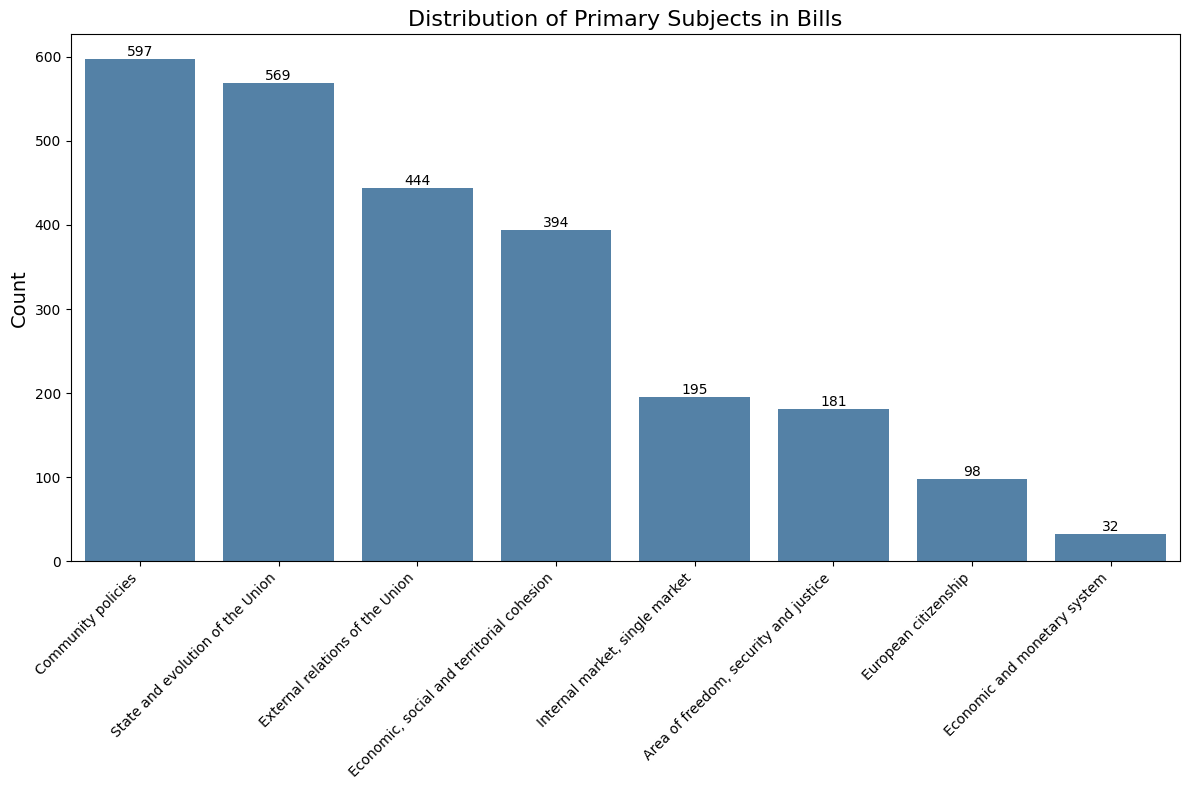

In [20]:
# Count the occurrences of each primary subject
primary_subject_counts = primary_subject_bills['primary_subject'].value_counts()

# Plotting the bar plot for primary subjects
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=primary_subject_counts.index,
    y=primary_subject_counts.values,
    color='steelblue'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

# Set title and axis labels
plt.title('Distribution of Primary Subjects in Bills', fontsize=16)
plt.xlabel('')
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## 5. Creation of the Secondary Subject Bills Dataset
<a id="Creation-of-the-Secondary-Subject-Bills-Dataset"></a>

In [21]:
# Create a new column for the secondary subject by extracting up until the second part of the 'subjects' column
# Use conditional logic to handle subjects without a secondary level, setting such cases to None
bills_exploded['secondary_subject'] = bills_exploded['subjects'].apply(
    lambda x: '.'.join(x.split('.')[:2]) if len(x.split('.')) > 1 else None
)

# Drop rows where the secondary_subject is None (no secondary level)
bills_with_secondary = bills_exploded.dropna(subset=['secondary_subject'])

# Remove duplicates based on 'procedure_reference' and 'secondary_subject', keeping only the first occurrence (as all the remaining information is the same) 
# and saving the results to a new dataset called 'secondary_subject_bills'
secondary_subject_bills = bills_with_secondary.drop_duplicates(subset=['procedure_reference', 'secondary_subject'])

# Convert the primary_subject and secondary_subject columns to string datatype
secondary_subject_bills["primary_subject"] = secondary_subject_bills["primary_subject"].astype(str)
secondary_subject_bills["secondary_subject"] = secondary_subject_bills["secondary_subject"].astype(str)

# Display the resulting Secondary Subject Bills dataframe
secondary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject,secondary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,3,3.20
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,6,6.40
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,3,3.20
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,3,3.20
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,3,3.20
...,...,...,...,...,...,...,...
3713,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08,6,6.10
3714,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,6.10.04,6,6.10
3715,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.10.04,7,7.10
3716,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05,7,7.30


In [22]:
# Merge secondary_subject_bills with primary_subject_correspondence to replace the primary subject identifier with its name
secondary_subject_bills = secondary_subject_bills.merge(
    primary_subject_correspondence,
    left_on='primary_subject',
    right_on='identifier',
    how='left'
)

# Replace the primary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
secondary_subject_bills['primary_subject'] = secondary_subject_bills['primary_subject_y']
secondary_subject_bills.drop(columns=['primary_subject_x', 'primary_subject_y', 'identifier'], inplace=True)

# Merge secondary_subject_bills with secondary_subject_correspondence to replace the secondary subject identifier with its name
secondary_subject_bills = secondary_subject_bills.merge(
    secondary_subject_correspondence,
    left_on='secondary_subject',
    right_on='identifier',
    how='left'
)

# Replace the secondary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
secondary_subject_bills['secondary_subject'] = secondary_subject_bills['secondary_subject_y']
secondary_subject_bills.drop(columns=['secondary_subject_x', 'secondary_subject_y', 'identifier'], inplace=True)

# Visualize the resulting dataframe
secondary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject,secondary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,Community policies,Transport policy in general
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,External relations of the Union,Relations with third countries
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,Community policies,Transport policy in general
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,Community policies,Transport policy in general
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,Community policies,Transport policy in general
...,...,...,...,...,...,...,...
2864,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08,External relations of the Union,Common foreign and security policy (CFSP)
2865,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,6.10.04,External relations of the Union,Common foreign and security policy (CFSP)
2866,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.10.04,"Area of freedom, security and justice",Free movement and integration of third-country nationals
2867,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05,"Area of freedom, security and justice","Police, judicial and customs cooperation in general"


In [23]:
# Check the unique secondary subjects
secondary_subject_bills["secondary_subject"].unique()

array(['Transport policy in general', 'Relations with third countries',
       'Free movement of goods', 'Global economy and globalisation',
       'Common commercial policy in general', 'Development cooperation',
       'Free movement and integration of third-country nationals',
       'Institutions of the Union',
       'Social policy, social charter and protocol',
       'Police, judicial and customs cooperation in general',
       'Judicial cooperation',
       'Employment policy, action to combat unemployment',
       'Common foreign and security policy (CFSP)', 'EU law',
       'Environmental policy', 'Treaties in general', 'Taxation',
       'Enterprise policy, inter-company cooperation',
       'Free movement of capital',
       'Free movement of services, freedom to provide',
       'Information and communications in general', 'Budget of the Union',
       "Consumers' protection in general",
       'Common cultural area, cultural diversity', 'Fisheries policy',
       'Agricul

In [24]:
# Check how many unique secondary subjects exist
print(f'There are {secondary_subject_bills["secondary_subject"].nunique()} unique secondary subjects')

There are 47 unique secondary subjects


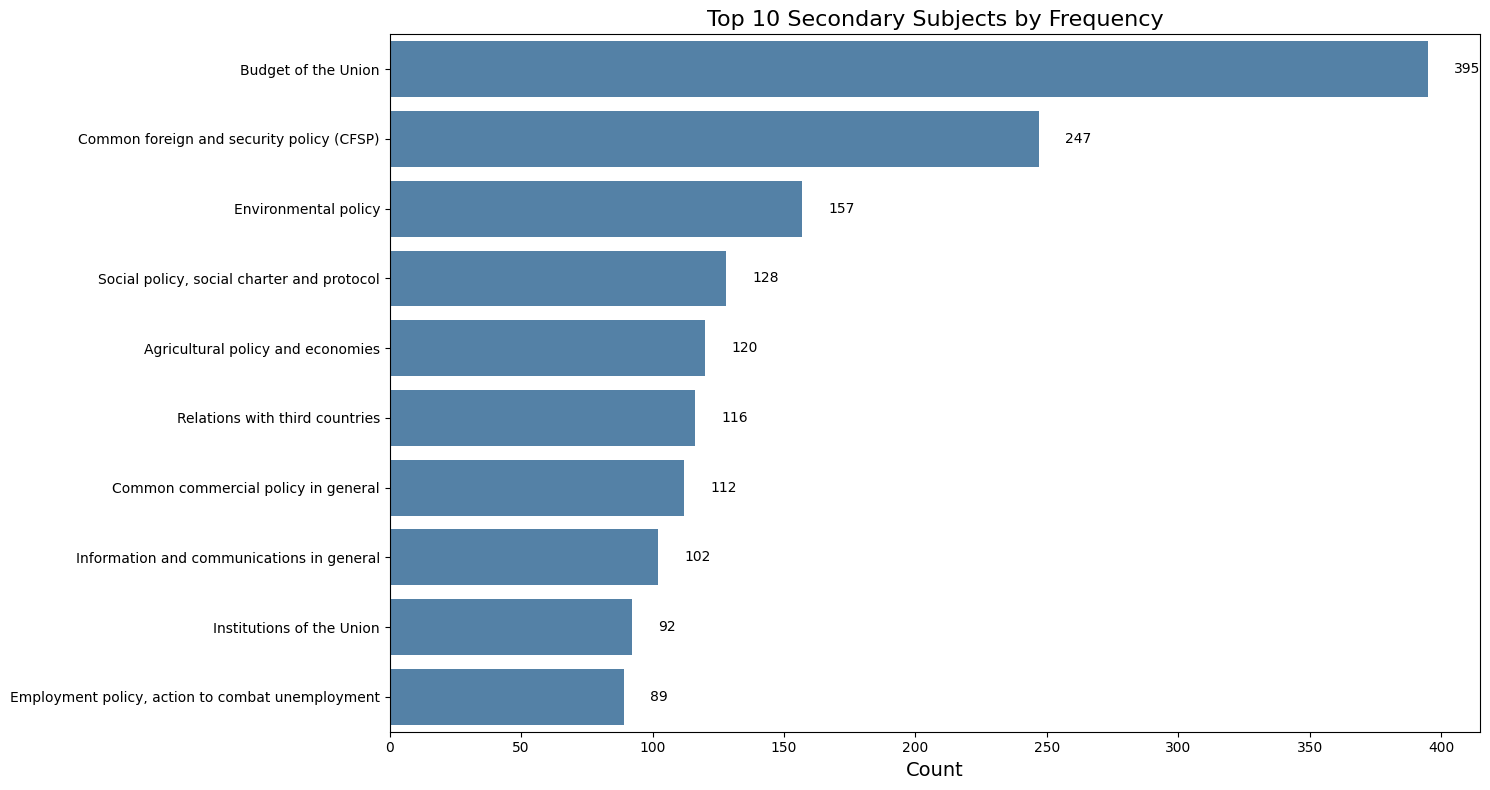

In [25]:
# Count the occurrences of each secondary subject and get the top 10
top_secondary_subjects = secondary_subject_bills['secondary_subject'].value_counts().head(10)

# Plotting the bar plot for the top 10 secondary subjects
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    y=top_secondary_subjects.index,
    x=top_secondary_subjects.values,
    color='steelblue'
)

# Add counts on the right of each bar
for p in ax.patches:
    plt.text(
        p.get_width() + 10,  
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        va='center', fontsize=10
    )

# Set title and axis labels
plt.title('Top 10 Secondary Subjects by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## 6. Creation of the Tertiary Subject Bills Dataset
<a id="Creation-of-the-Tertiary-Subject-Bills-Dataset"></a>

In [26]:
# Create a new column for the tertiary subject by extracting up until the third part of the 'subjects' column
# Use conditional logic to handle subjects without a tertiary level, setting such cases to None
bills_exploded['tertiary_subject'] = bills_exploded['subjects'].apply(
    lambda x: '.'.join(x.split('.')[:3]) if len(x.split('.')) > 2 else None
)

# Drop rows where the tertiary_subject is None (no tertiary level)
bills_with_tertiary = bills_exploded.dropna(subset=['tertiary_subject'])

# Remove duplicates based on 'procedure_reference' and 'tertiary_subject', keeping only the first occurrence (as all the remaining information is the same) 
# and saving the results to a new dataset called 'tertiary_subject_bills'
tertiary_subject_bills = bills_with_tertiary.drop_duplicates(subset=['procedure_reference', 'tertiary_subject'])

# Convert the primary_subject and secondary_subject columns to string datatype. Note that it is not necessary to convert the tertiary_subject column
# to string datatype as it already has that format
tertiary_subject_bills["primary_subject"] = tertiary_subject_bills["primary_subject"].astype(str)
tertiary_subject_bills["secondary_subject"] = tertiary_subject_bills["secondary_subject"].astype(str)

# Display the resulting Tertiary Subject Bills dataframe
tertiary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject,secondary_subject,tertiary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,3,3.20,3.20.15
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,6,6.40,6.40.05
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,3,3.20,3.20.15
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,3,3.20,3.20.15
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,3,3.20,3.20.15
...,...,...,...,...,...,...,...,...
3713,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08,6,6.10,6.10.08
3714,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,6.10.04,6,6.10,6.10.04
3715,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.10.04,7,7.10,7.10.04
3716,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05,7,7.30,7.30.05


In [27]:
# Merge tertiary_subject_bills with primary_subject_correspondence to replace the primary subject identifier with its name
tertiary_subject_bills = tertiary_subject_bills.merge(
    primary_subject_correspondence,
    left_on='primary_subject',
    right_on='identifier',
    how='left'
)

# Replace the primary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
tertiary_subject_bills['primary_subject'] = tertiary_subject_bills['primary_subject_y']
tertiary_subject_bills.drop(columns=['primary_subject_x', 'primary_subject_y', 'identifier'], inplace=True)

# Merge tertiary_subject_bills with secondary_subject_correspondence to replace the secondary subject identifier with its name
tertiary_subject_bills = tertiary_subject_bills.merge(
    secondary_subject_correspondence,
    left_on='secondary_subject',
    right_on='identifier',
    how='left'
)

# Replace the secondary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
tertiary_subject_bills['secondary_subject'] = tertiary_subject_bills['secondary_subject_y']
tertiary_subject_bills.drop(columns=['secondary_subject_x', 'secondary_subject_y', 'identifier'], inplace=True)

# Merge tertiary_subject_bills with tertiary_subject_correspondence to replace the tertiary subject identifier with its name
tertiary_subject_bills = tertiary_subject_bills.merge(
    tertiary_subject_correspondence,
    left_on='tertiary_subject',
    right_on='identifier',
    how='left'
)

# Replace the tertiary_subject column with the corresponding name and drop the identifier column and the extra columns generated by the merge operation
tertiary_subject_bills['tertiary_subject'] = tertiary_subject_bills['tertiary_subject_y']
tertiary_subject_bills.drop(columns=['tertiary_subject_x', 'tertiary_subject_y', 'identifier'], inplace=True)

# Visualize the resulting dataframe
tertiary_subject_bills

,timestamp,procedure_reference,id_bill,text,subjects,primary_subject,secondary_subject,tertiary_subject
0,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,3.20.15.02,Community policies,Transport policy in general,Transport agreements and cooperation
1,2020-06-17 23:24:52,2007/0181(NLE),200,ecmorocco euro-mediterranean aviation agreement protocol follow accession bulgaria romania,6.40.05.02,External relations of the Union,Relations with third countries,Relations with the Mediterranean and southern European countries
2,2021-12-14 14:49:19,2010/0112(NLE),786,recommendation draft council decision conclusion behalf european union protocol amend air transport agreement united states america european community member states,3.20.15.02,Community policies,Transport policy in general,Transport agreements and cooperation
3,2020-06-17 23:24:52,2010/0180(NLE),201,eujordan agreement euro-mediterranean aviation agreement,3.20.15.02,Community policies,Transport policy in general,Transport agreements and cooperation
4,2020-06-17 23:24:52,2010/0186(NLE),203,eugeorgia agreement common aviation area,3.20.15.02,Community policies,Transport policy in general,Transport agreements and cooperation
...,...,...,...,...,...,...,...,...
3242,2024-04-25 12:53:44,2024/2703(RSP),1900,joint motion resolution,6.10.08,External relations of the Union,Common foreign and security policy (CFSP),"Fundamental freedoms, human rights, democracy in general"
3243,2024-04-25 12:58:39,2024/2704(RSP),1899,irans unprecedented attack israel need de-escalation eu response,6.10.04,External relations of the Union,Common foreign and security policy (CFSP),"Third-country political situation, local and regional conflicts"
3244,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.10.04,"Area of freedom, security and justice",Free movement and integration of third-country nationals,"External borders crossing and controls, visas"
3245,2021-06-07 20:37:34,2019/0001A(COD),597,etias consequential amendment police judicial cooperation,7.30.05,"Area of freedom, security and justice","Police, judicial and customs cooperation in general",Police cooperation


In [28]:
# Check the unique tertiary subjects
tertiary_subject_bills["tertiary_subject"].unique()

array(['Transport agreements and cooperation',
       'Relations with the Mediterranean and southern European countries',
       'Public procurement',
       'Agreements and relations in the context of the World Trade Organization (WTO)',
       'Export/import control, trade defence, trade barriers',
       'Bilateral economic and trade agreements and relations',
       'Union Customs Code, tariffs, preferential arrangements, rules of origin',
       'Generalised scheme of tariff preferences (GSP), rules of origin',
       'Relations with EEA/EFTA countries',
       'Asylum, refugees, displaced persons; Asylum, Migration and Integration Fund (AMIF)',
       'Agencies and bodies of the EU', 'Relations with Asian countries',
       'Women condition and rights', 'Action to combat crime',
       'Migration policy', 'Judicial cooperation in criminal matters',
       'Workforce, occupational mobility, job conversion, working conditions',
       'External borders crossing and controls, visas'

In [29]:
# Check how many unique tertiary subjects exist
print(f'There are {tertiary_subject_bills["tertiary_subject"].nunique()} unique tertiary subjects')

There are 252 unique tertiary subjects


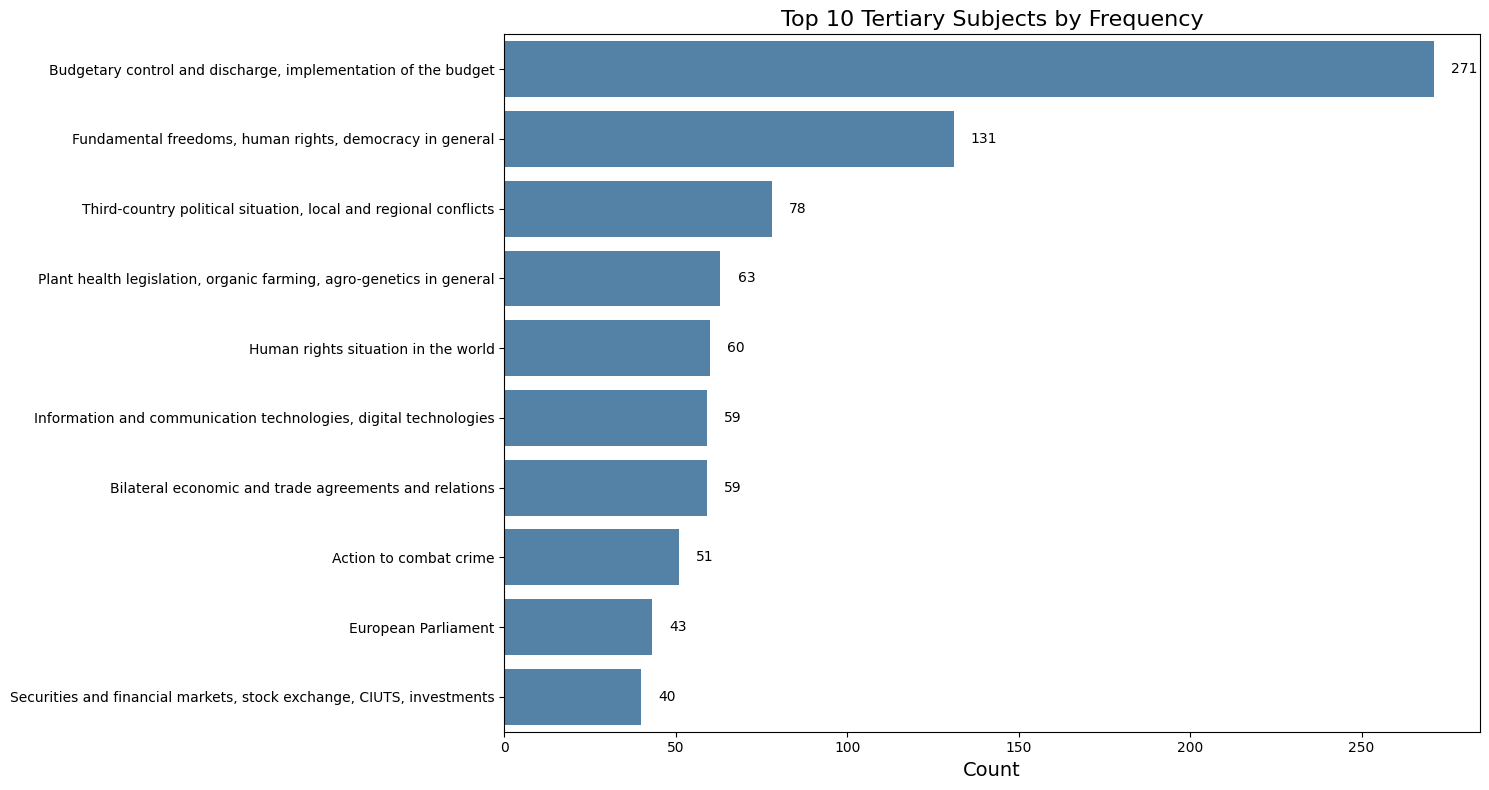

In [30]:
# Count the occurrences of each tertiary subject and get the top 10
top_tertiary_subjects = tertiary_subject_bills['tertiary_subject'].value_counts().head(10)

# Plotting the bar plot for the top 10 tertiary subjects
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    y=top_tertiary_subjects.index,
    x=top_tertiary_subjects.values,
    color='steelblue'
)

# Add counts on the right of each bar
for p in ax.patches:
    plt.text(
        p.get_width() + 5,  
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        va='center', fontsize=10
    )

# Set title and axis labels
plt.title('Top 10 Tertiary Subjects by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## 7. Exporting Datasets
<a id="Exporting-Datasets"></a>

In [31]:
# Export the bills, primary_subject_bills, secondary_subject_bills and tertiary_subject_bills datasets in their current stages to the 
# corresponding local folders
bills.to_csv("../datasets/second_stage/6_bill_subject_assignment/bills.csv", index=False)
primary_subject_bills.to_csv("../datasets/second_stage/6_bill_subject_assignment/primary_subject_bills.csv", index=False)
secondary_subject_bills.to_csv("../datasets/second_stage/6_bill_subject_assignment/secondary_subject_bills.csv", index=False)
tertiary_subject_bills.to_csv("../datasets/second_stage/6_bill_subject_assignment/tertiary_subject_bills.csv", index=False)